# Imports

In [ ]:
import time
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import neighbors
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt  # visualisation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor

# Leer archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/wind_ava.csv'
df = pd.read_csv(file_path)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


# EDA

## Análisis de atributos e instancias



In [ ]:
num_instances, num_features = df.shape
print("Number of instances: ", num_instances)
print("Number of features: ", num_features)

Number of instances:  4748
Number of features:  552


## Análisis de cada atributo
Esto es un análisi

In [ ]:
variable_types = df.dtypes
columns = df.columns
missing_values = df.isnull().sum()
print("Tipos de variables:")
for i in range(len(variable_types)):
    if variable_types[i] in ['float64', 'int64']:
        print(columns[i], ": ", variable_types[i], "-> numérico. || Missing values: ", missing_values[i])
    else:
        print(columns[i], ": ", variable_types[i], "-> categórico. || Missing values: ", missing_values[i])

Tipos de variables:
datetime :  object -> categórico. || Missing values:  0
energy :  float64 -> numérico. || Missing values:  0
p54.162.1 :  float64 -> numérico. || Missing values:  0
p54.162.2 :  float64 -> numérico. || Missing values:  0
p54.162.3 :  float64 -> numérico. || Missing values:  0
p54.162.4 :  float64 -> numérico. || Missing values:  0
p54.162.5 :  float64 -> numérico. || Missing values:  0
p54.162.6 :  float64 -> numérico. || Missing values:  0
p54.162.7 :  float64 -> numérico. || Missing values:  0
p54.162.8 :  float64 -> numérico. || Missing values:  0
p54.162.9 :  float64 -> numérico. || Missing values:  0
p54.162.10 :  float64 -> numérico. || Missing values:  0
p54.162.11 :  float64 -> numérico. || Missing values:  0
p54.162.12 :  float64 -> numérico. || Missing values:  0
p54.162.13 :  float64 -> numérico. || Missing values:  0
p54.162.14 :  float64 -> numérico. || Missing values:  0
p54.162.15 :  float64 -> numérico. || Missing values:  0
p54.162.16 :  float64 -> 

## Atributos duplicados, vacíos y constantes

In [ ]:
# Mostrar columnas con valores faltantes
print("Columnas con valores faltantes:")
if missing_values.sum() == 0:
    print("No hay columnas con valores faltantes")
else:
    for col in columns:
        if missing_values[col] > 0:
            print(col, ": ", missing_values[col])

# Columnas constantes
constant_columns = df.columns[df.nunique() == 1]
print("Columnas constantes:")
if len(constant_columns) == 0:
    print("No hay columnas constantes")
else:
    for col in constant_columns:
        print(col)

# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas: ", duplicated_rows.sum())

# Filas vacías
empty_rows = df.isnull().all(axis=1)
print("Filas vacías: ", empty_rows.sum())

Columnas con valores faltantes:
No hay columnas con valores faltantes
Columnas constantes:
No hay columnas constantes
Filas duplicadas:  0
Filas vacías:  0


## Naturaleza del problema

In [ ]:
problem_type = "Problema de Regresión" if df['energy'].dtype in ['float64', 'int64'] else "Problema de Clasificación"
print(f"Naturaleza del problema: {problem_type}")

Naturaleza del problema: Problema de Regresión


## Selección de columnas relevantes

In [ ]:
# Eliminación de variables meteorológicas no correspondientes a la localización 13
print("Columnas relevantes:")
relevant_columns = [col for col in df.columns if col.endswith(".13") or col in ['datetime', 'energy']]
df_relevant = df[relevant_columns]
print("Número de columnas relevantes: ", len(df_relevant.columns))

Columnas relevantes:
Número de columnas relevantes:  24


## Análisis de la variable objetivo

In [ ]:
maximo = df_relevant['energy'].max()
minimo = df_relevant['energy'].min()
promedio = df_relevant['energy'].mean()

print("Máximo de la columna 'energía':", maximo)
print("Mínimo de la columna 'energía':", minimo)
print("Promedio de la columna 'energía':", promedio)

Máximo de la columna 'energía': 2792.55
Mínimo de la columna 'energía': 0.01
Promedio de la columna 'energía': 693.126246840775


## Renombrado de columnas

In [ ]:
df_relevant = df_relevant.rename(columns={
    't2m.13': 'temp_2m',
    'u10.13': 'wind_U_10m',
    'v10.13': 'wind_V_10m',
    'u100.13': 'wind_U_100m',
    'v100.13': 'wind_V_100m',
    'cape.13': 'convective_energy',
    'flsr.13': 'log_surface_roughness_heat_forecast',
    'fsr.13': 'surface_roughness_forecast',
    'iews.13': 'eastward_turbulent_stress',
    'inss.13': 'northward_turbulent_stress',
    'lai_hv.13': 'lai_high_vegetation',
    'lai_lv.13': 'lai_low_vegetation',
    'u10n.13': 'neutral_wind_10m_U',
    'v10n.13': 'neutral_wind_10m_V',
    'stl1.13': 'soil_temp_level_1',
    'stl2.13': 'soil_temp_level_2',
    'stl3.13': 'soil_temp_level_3',
    'stl4.13': 'soil_temp_level_4',
    'sp.13': 'surface_pressure',
    'p54.162.13': 'vertical_integral_temp',
    'p59.162.13': 'vertical_integral_div_kinetic_energy',
    'p55.162.13': 'vertical_integral_water_vapour',
    'datetime': 'datetime',
    'energy': 'energy'
})

## Conversión de tiempo en formato fecha

In [ ]:
df_relevant['datetime'] = pd.to_datetime(df_relevant['datetime'])

df_relevant['year'] = df_relevant['datetime'].dt.year
df_relevant['month'] = df_relevant['datetime'].dt.month
df_relevant['day'] = df_relevant['datetime'].dt.day
df_relevant['hour'] = df_relevant['datetime'].dt.hour

# Días sin mediciones

In [ ]:
# Find the range of dates
min_date = df_relevant['datetime'].min()
max_date = df_relevant['datetime'].max()

# Extract unique dates from the datetime column
unique_dates_with_measurements = df_relevant['datetime'].dt.date.unique()

# Generate a range of dates within the specified range
date_range = pd.date_range(min_date, max_date, freq='D')

# Identify the missing dates
missing_dates = set(date_range.date) - set(unique_dates_with_measurements)

# Convert missing dates to DataFrame
missing_dates_df = pd.DataFrame({'missing_dates': list(missing_dates)})

# Sort the DataFrame by 'missing_dates' column
missing_dates_df['missing_dates'] = pd.to_datetime(missing_dates_df['missing_dates'])
missing_dates_df = missing_dates_df.sort_values(by='missing_dates')

# Display the missing dates
print("Days with no measurements:")
print(missing_dates_df.to_string(index=False))
print("Total: ", len(missing_dates_df))

Days with no measurements:
missing_dates
   2005-06-12
   2005-06-19
   2005-12-22
   2006-01-21
   2006-01-22
   2006-11-11
   2006-12-24
   2007-02-05
   2007-03-12
   2007-03-13
   2007-03-14
   2007-03-15
   2007-03-16
   2007-03-17
   2007-03-18
   2007-03-19
   2007-03-20
   2007-03-21
   2007-03-22
   2007-03-23
   2007-03-24
   2007-03-25
   2007-03-26
   2007-03-27
   2007-03-28
   2007-03-29
   2007-03-30
   2007-03-31
   2007-04-01
   2007-04-02
   2007-04-03
   2007-09-26
   2007-09-27
   2007-10-08
   2007-12-15
   2007-12-30
   2008-02-10
   2008-02-11
   2008-02-26
   2008-02-27
   2008-02-28
   2008-02-29
   2008-03-01
   2008-03-02
   2008-03-03
   2008-03-04
   2008-03-05
   2008-03-06
   2008-03-07
   2008-03-08
   2008-03-09
   2008-03-10
   2008-03-11
   2008-03-12
   2008-03-13
   2008-03-14
   2008-03-15
   2008-03-16
   2008-03-17
   2008-03-18
   2008-03-19
   2008-03-20
   2008-03-21
   2008-03-22
   2008-03-23
   2008-03-24
   2008-03-25
   2008-03-26
   2008

# Meses sin mediciones

In [ ]:
# Find the range of months
min_month = df_relevant['datetime'].min().to_period('M')
max_month = df_relevant['datetime'].max().to_period('M')

# Extract unique months from the datetime column
unique_months_with_measurements = df_relevant['datetime'].dt.to_period('M').unique()

# Generate a range of months within the specified range
month_range = pd.period_range(min_month, max_month, freq='M')

# Identify the missing months
missing_months = set(month_range) - set(unique_months_with_measurements)

# Convert missing months to DataFrame
missing_months_df = pd.DataFrame({'missing_months': list(missing_months)})

# Sort the DataFrame by 'missing_months' column
missing_months_df = missing_months_df.sort_values(by='missing_months')

# Display the missing months
print("Months with no measurements:")
print(missing_months_df.to_string(index=False))
print("Total: ", len(missing_months_df))

Months with no measurements:
missing_months
       2008-03
       2008-04
       2008-05
       2008-06
       2008-07
       2008-08
       2008-09
       2008-10
       2008-11
       2008-12
       2009-01
       2009-02
Total:  12


# Gráficos

### Días sin mediciones - Raw data



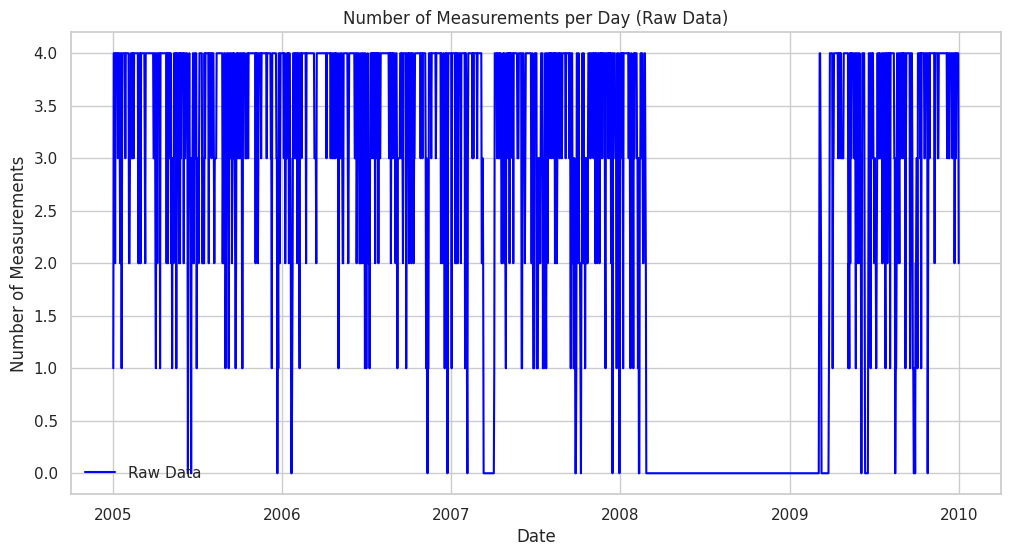

In [ ]:
sns.set(color_codes=True)
sns.set(style="whitegrid")
measurements_per_day = df_relevant.groupby(df_relevant['datetime'].dt.date).size().reset_index(name='measurement_count')
# Create a continuous date range spanning the entire period
full_date_range = pd.date_range(start=measurements_per_day['datetime'].min(), end=measurements_per_day['datetime'].max(), freq='D')

# Convert the "datetime" column in the original DataFrame to datetime data type
measurements_per_day['datetime'] = pd.to_datetime(measurements_per_day['datetime'])

# Merge with the actual data and fill missing values with 0
measurements_per_day = pd.DataFrame({'datetime': full_date_range}).merge(measurements_per_day, on='datetime', how='left').fillna(0)

# Plot the raw data
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count', data=measurements_per_day, color='blue', label='Raw Data')

# Adding labels and title
plt.title('Number of Measurements per Day (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Días sin mediciones - Smoothed data


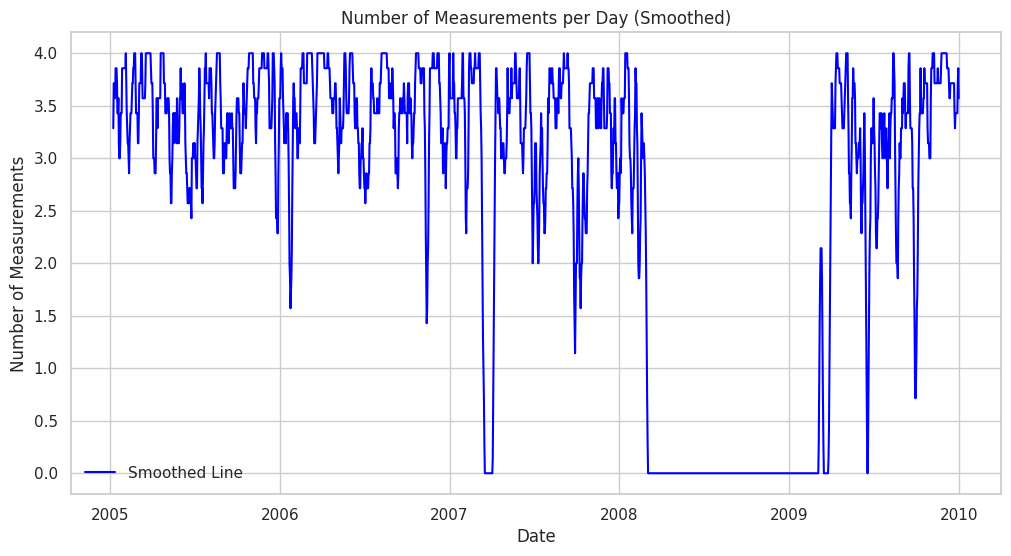

In [ ]:
# Smooth the data with a rolling average
window_size = 7  # You can adjust the window size based on your preference
measurements_per_day['measurement_count_smoothed'] = measurements_per_day['measurement_count'].rolling(window=window_size).mean()

# Plot the smoothed line using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='measurement_count_smoothed', data=measurements_per_day, color='blue', label='Smoothed Line')

# Adding labels and title
plt.title('Number of Measurements per Day (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Measurements')

plt.legend()
plt.show()

### Evolución de la energía en el tiempo

<ipython-input-46-cd139e394c49>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


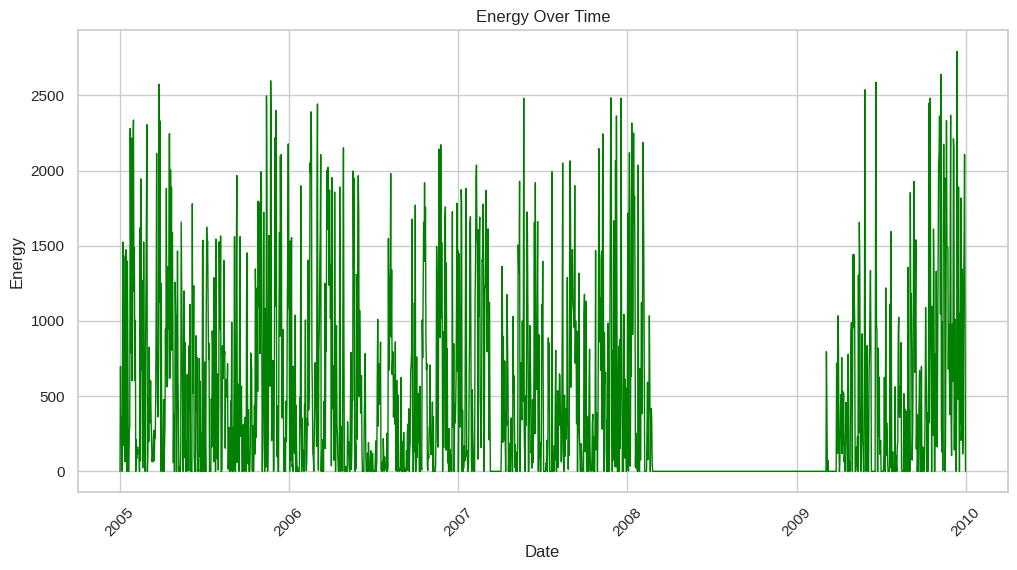

In [ ]:
import matplotlib.dates as mdates

# Plotting the energy over time with each day on the x-axis and yearly ticks
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.grid(True)

# Set the x-axis ticks to display only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()




### Evolución de la energía durante un año (2017)
Se calcula la media de energía para cada día para mostrar un gráfico más suave y comprensible

<ipython-input-55-5446a20db8d4>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


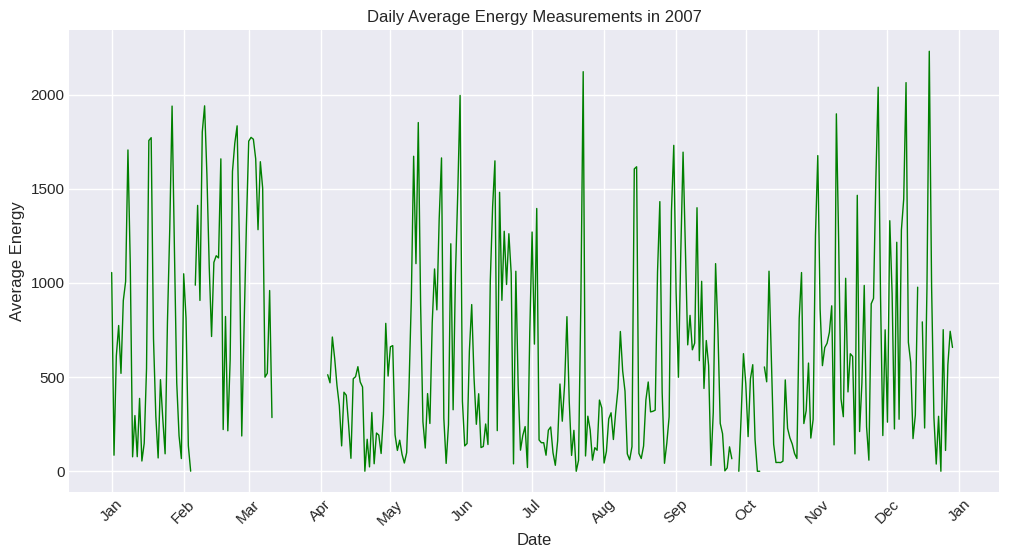

In [ ]:
# Filter the data for the year 2007
df_2007 = df_relevant[df_relevant['year'] == 2007]

# Set 'datetime' column as index
df_2007.set_index('datetime', inplace=True)

# Resample the data to get the daily average energy measurement for each day of the year
df_2007_daily_avg = df_2007.resample('D').mean()

# Plotting the daily average energy over time
plt.figure(figsize=(12, 6))
plt.plot(df_2007_daily_avg.index, df_2007_daily_avg['energy'], color='green', linestyle='-', linewidth=1)
plt.title('Daily Average Energy Measurements in 2007')
plt.xlabel('Date')
plt.ylabel('Average Energy')
plt.grid(True)

# Set the x-axis ticks to display only the months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot style
plt.style.use('seaborn-darkgrid')

plt.show()


# Selección de escalador
Inner o outer??

In [ ]:
inner_cv = TimeSeriesSplit(n_splits=3)
df_relevant = df_relevant.drop(columns=['datetime']) # si quitamos esto estalla por qué??

X,y = df_relevant.drop(columns=['energy']),df_relevant['energy']

scores = {}
#Min max
pipeline_min_max = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', neighbors.KNeighborsRegressor())
    ])

scores_min_max = cross_val_score(pipeline_min_max,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["MinMaxScaler"] = -np.mean(scores_min_max)

#Standard
pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])

scores_std = cross_val_score(pipeline_standard,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["StandardScaler"] = -np.mean(scores_std)

#Robust
pipeline_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])

scores_robust = cross_val_score(pipeline_robust,X,y,cv = inner_cv,scoring="neg_root_mean_squared_error")
scores["RobustScaler"] = -np.mean(scores_robust)


print("Para MinMaxScaler, la media de rmse es: ",scores["MinMaxScaler"])
print("Para Standard, la media de rmse es: ",scores["StandardScaler"])
print("Para Robust, la media de rmse es: ",scores["RobustScaler"])


Para MinMaxScaler, la media de rmse es:  545.1412378487257
Para Standard, la media de rmse es:  479.37296174076965
Para Robust, la media de rmse es:  461.2175957436966


La media más baja para el rmse es la del Robust scaler por lo que usaremos ese escalador cuando usemos KNN regressor.


# Modelos

## Hiperparámetros por omisión

### KNN

In [ ]:
# KNN con RobustScaler
pipeline_KNN = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', neighbors.KNeighborsRegressor())
])
scores_KNN_hpo = cross_val_score(pipeline_KNN, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
score_KNN = -np.mean(scores_KNN_hpo)

print("Estimación de rendimiento de KNN con RobustScaler:", score_KNN)

Estimación de rendimiento de KNN con RobustScaler: 461.2175957436966


### Decission Tree

In [ ]:
pipeline_Dec_tree = Pipeline([
    ('decision_tree', DecisionTreeRegressor())
])
scores_Dec_tree_hpo = cross_val_score(pipeline_Dec_tree, X, y, cv=inner_cv, scoring="neg_root_mean_squared_error")
score_Dec_tree = -np.mean(scores_Dec_tree_hpo)

print("Estimación de rendimiento de Decision tree:", score_Dec_tree)

Estimación de rendimiento de Decision tree: 519.7312532790185
